In [1]:
import pandas as pd
import numpy as np

In [4]:
data1 = pd.read_csv("C:/Users/Bilal/Desktop/New folder/fraudTest.csv")
data2 = pd.read_csv("C:/Users/Bilal/Desktop/New folder/fraudTrain.csv")

In [5]:
df = pd.concat([data1, data2])

In [6]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [60]:
ddf = df.sample(frac=1, random_state=1).reset_index()
df = df.head(n=100000)

In [10]:
df.is_fraud.value_counts()

is_fraud
0    99478
1      522
Name: count, dtype: int64

In [61]:
# Removing un necessary Data 
df = df.drop('first', axis=1)
df = df.drop('last', axis=1)
df = df.drop('street', axis=1)
df = df.drop('city', axis=1)

In [21]:
df['distance'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)


In [22]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [23]:
def pull_hour(ts):
    return ts.hour
df['hour'] = df['trans_date_trans_time'].apply(pull_hour)

In [29]:
# function to calculate last 30 day spending
def sum_30_day(unixtime, cc_num):
    unixstamp = unixtime
    minus30 = unixstamp - 2629743
    ccnum = cc_num
    sumtable = df.loc[(df["cc_num"] == ccnum) & (df['unix_time'] < unixstamp) & (df['unix_time'] > minus30)]
    history30 = sumtable['amt'].sum()
    return history30

    
# running function and creating a new variable for it
df['history_30'] = df.apply(lambda x: sum_30_day(x.unix_time, x.cc_num), axis=1)


# measuring interaction effect with amt in new variable
df['interaction_30'] = df['history_30'] / df['amt']

In [33]:
# dropping non categorical variables in preperation for regression modeling

df = df.drop('trans_date_trans_time', axis=1)
df = df.drop('state', axis=1)
df = df.drop('merchant', axis=1)
df = df.drop('job', axis=1)
df = df.drop('dob', axis=1)
df = df.drop('category', axis=1)
df = df.drop('gender', axis=1)
df = df.drop('index', axis=1)

In [34]:
df

,level_0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,distance,hour,history_30,interaction_30
0,43660,4481131401752,50.43,1545,42.2848,-71.7205,35299,1339130166,42.396578,-72.712359,0,0.998138,4,0.00,0.000000
1,87278,377026671291680,8.07,63665,37.3272,-91.0243,241,1340979532,37.615445,-90.447001,0,0.645259,14,358.10,44.374226
2,14317,4607072969078276,70.97,73027,35.8985,-97.2607,1493,1373466616,36.862964,-98.175252,0,1.329134,14,545.49,7.686205
3,81932,4173950183554608,31.24,7750,40.3330,-73.9809,3279,1367469326,39.863487,-74.011938,0,0.470538,4,192.17,6.151408
4,95321,4040099974063068803,98.60,58769,48.3396,-102.2400,229,1332058656,49.299062,-102.970162,0,1.205696,8,310.23,3.146349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,50057,30266994494236,9.99,23850,37.1349,-77.7364,1051,1347823032,36.253775,-77.572726,0,0.896198,19,232.50,23.273273
99996,98047,3568736585751727,77.50,50073,41.8114,-93.4855,1195,1384696738,41.750763,-94.024032,0,0.541935,13,417.57,5.388000
99997,5192,375767678113375,28.15,22853,38.6476,-78.7717,4367,1367634410,38.516525,-77.833224,0,0.947585,2,135.00,4.795737
99998,77708,6011399591920186,3.82,1257,42.1001,-73.3611,2121,1356460589,42.445613,-73.887867,0,0.629970,18,579.56,151.717277


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Representation of Correlation')

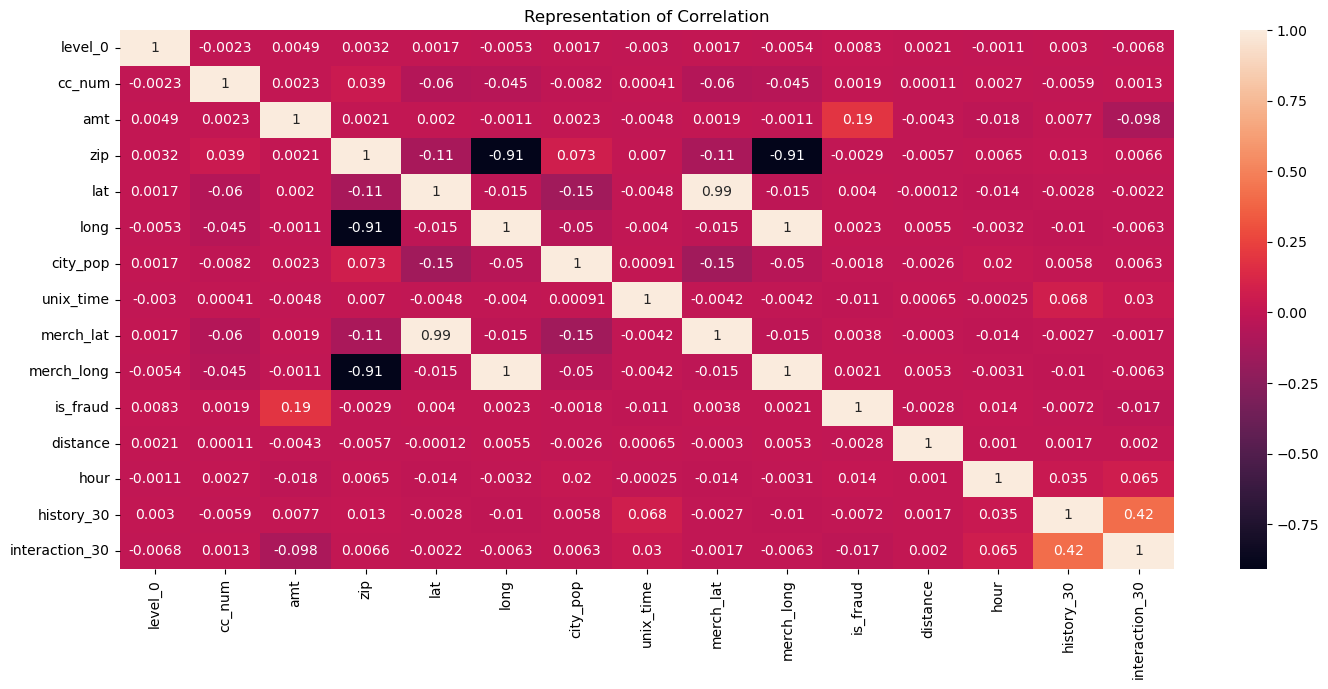

In [44]:
fig, ax = plt.subplots(figsize=(17,7))
sns.heatmap(df.corr(),annot=True).set_title('Representation of Correlation')

In [45]:
df = df.drop('cc_num', axis=1)
df = df.drop('zip', axis=1)
df = df.drop('lat', axis=1)
df = df.drop('long', axis=1)
df = df.drop('unix_time', axis=1)
df = df.drop('merch_lat', axis=1)
df = df.drop('merch_long', axis=1)

Text(0.5, 1.0, 'Representation of Correlation After Dropping Columns')

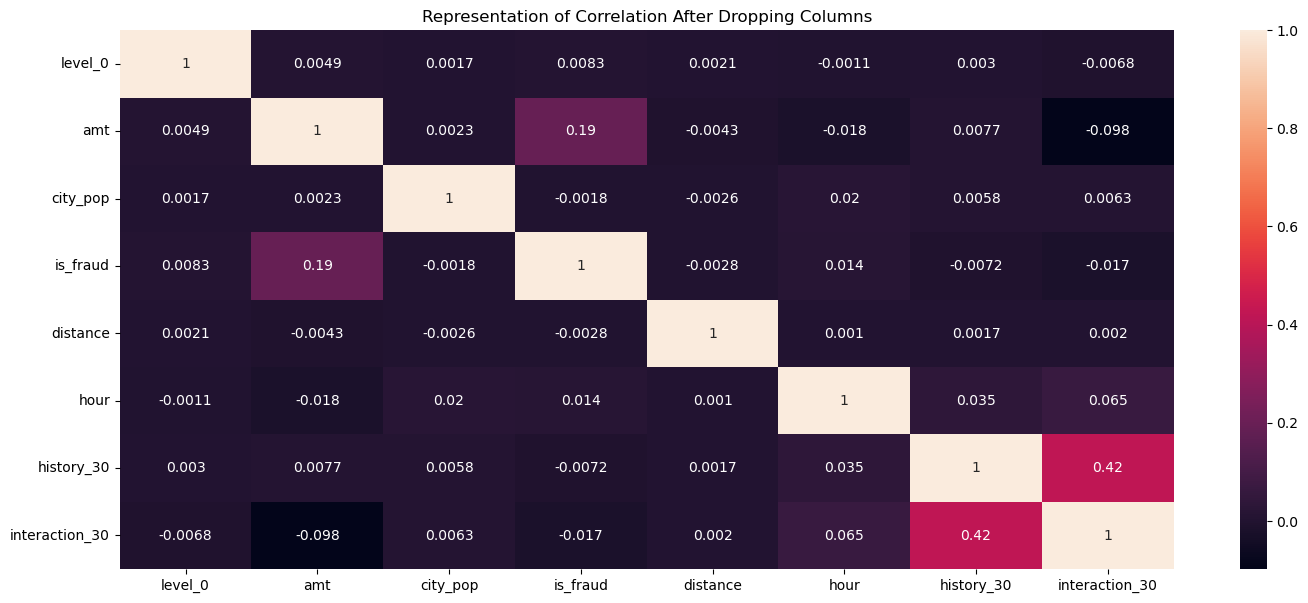

In [47]:
fig, ax = plt.subplots(figsize=(17,7))
sns.heatmap(df.corr(),annot=True).set_title('Representation of Correlation After Dropping Columns')

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
y = df['is_fraud']
x = df.drop('is_fraud', axis=1) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

accuracyLR = accuracy_score(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracyLR)

Logistic Regression Accuracy: 0.9943


In [62]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracyRFC = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracyRFC)

Random Forest Accuracy: 0.9958


In [68]:
from sklearn.ensemble import GradientBoostingClassifier 

In [72]:
model = GradientBoostingClassifier(random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracyGBC = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy:", accuracyGBC)

Gradient Boosting Accuracy: 0.9955


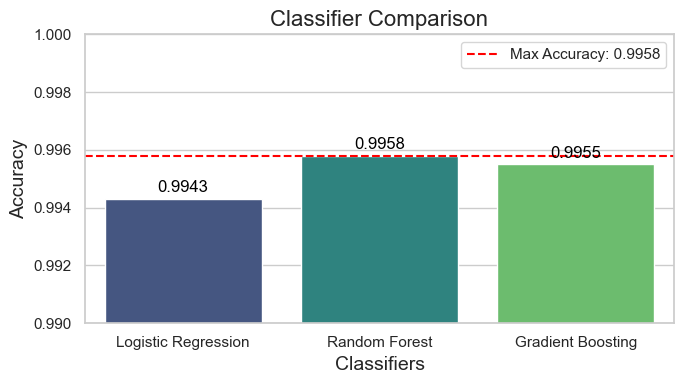

In [75]:
# Names of the classifiers
classifiers = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Corresponding accuracies
accuracies = [0.9943, 0.9958, 0.9955]

# Set up seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))

# Create a bar plot with colors and custom palette
ax = sns.barplot(x=classifiers, y=accuracies, palette='viridis')

# Adding data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Classifier Comparison', fontsize=16)
plt.ylim(0.99, 1.0)  # Set y-axis limit to show differences clearly

# Adding a horizontal line for the maximum accuracy
max_accuracy = max(accuracies)
plt.axhline(y=max_accuracy, color='red', linestyle='--', label=f'Max Accuracy: {max_accuracy:.4f}')
plt.legend()

plt.tight_layout()
plt.show()
